# Practice Project -2

# Salary Project

In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [3]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
df.isnull().sum()    #checking null values

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:>

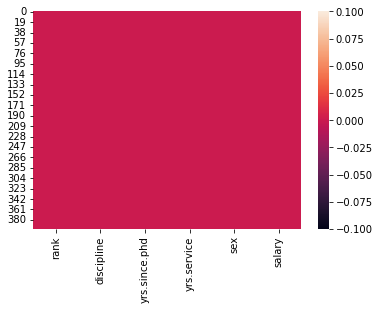

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.dtypes  # checking datatypes of columns

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [8]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [9]:
for i in df:
    print(i ,'-', df[i].nunique())
    
# checking the uniques vales in every column

rank - 3
discipline - 2
yrs.since.phd - 53
yrs.service - 52
sex - 2
salary - 371


In [10]:
df.loc[df['salary']==' ']   # checkinf for blank values if any

,rank,discipline,yrs.since.phd,yrs.service,sex,salary


In [11]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [12]:
le = LabelEncoder()

list1 =['rank','discipline','sex']
for val in list1:
    df[val]= le.fit_transform(df[val].astype(str))

df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


<AxesSubplot:>

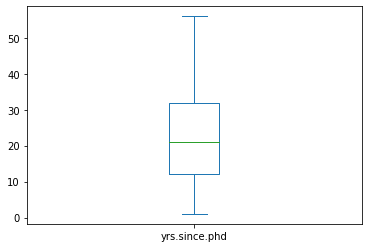

In [13]:
#checking outliers
df['yrs.since.phd'].plot.box()

<AxesSubplot:>

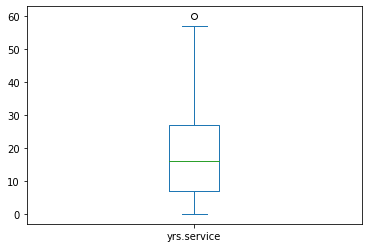

In [14]:
df['yrs.service'].plot.box()

yrs.since.phd : 0.29974153157458827


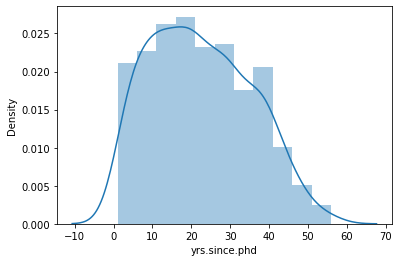

In [15]:
#checking skewness
from scipy.stats import skew
sns.distplot(df['yrs.since.phd'])
print('yrs.since.phd :',skew(df['yrs.since.phd']))

The data is normalized

yrs.service skewness : 0.6481088240680348


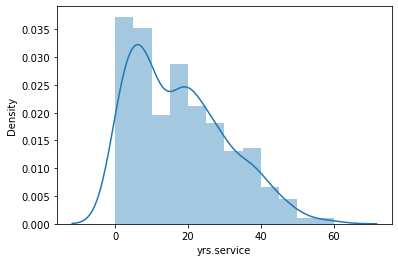

In [16]:
sns.distplot(df['yrs.service'])
print('yrs.service skewness :',skew(df['yrs.service']))

this is bimodal

<AxesSubplot:>

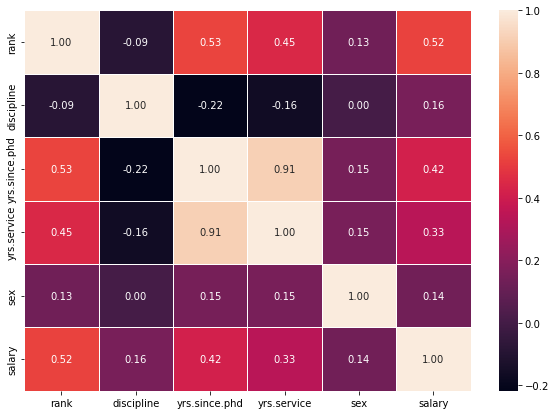

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="white",fmt='0.2f')

In [18]:
df.drop_duplicates(keep='first',inplace=True)

rank
2    266
0     64
1     63
Name: rank, dtype: int64


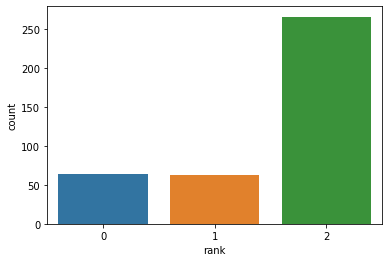

discipline
1    212
0    181
Name: discipline, dtype: int64


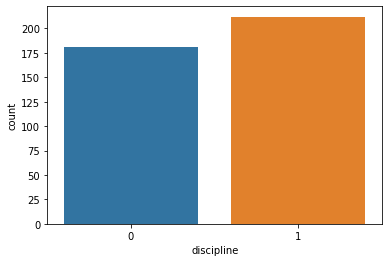

yrs.since.phd
4     16
28    16
8     14
19    13
20    13
13    12
12    12
17    12
21    11
23    11
38    11
10    10
39    10
31    10
11    10
14     9
25     9
15     9
22     9
9      9
30     9
27     8
37     8
29     8
35     8
33     8
16     8
18     8
40     7
3      7
32     6
45     6
26     6
24     6
6      6
7      6
5      6
2      5
43     5
36     5
1      4
41     4
42     4
49     4
46     4
34     3
56     2
52     1
51     1
54     1
47     1
48     1
44     1
Name: yrs.since.phd, dtype: int64


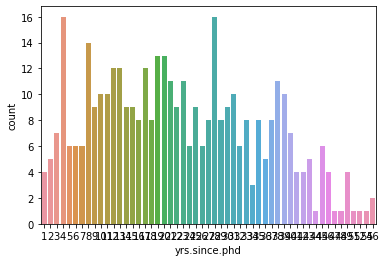

yrs.service
3     21
19    19
7     18
8     18
23    16
18    15
9     15
2     15
11    14
1     13
27    11
0     11
6     11
10    11
20    10
31    10
4     10
15     9
30     9
28     9
14     8
5      8
16     8
22     8
25     8
38     8
26     7
36     6
17     6
21     6
12     5
35     5
40     5
33     4
37     4
45     4
43     4
39     4
44     3
49     3
24     2
34     2
53     1
57     1
32     1
29     1
41     1
48     1
46     1
51     1
13     1
60     1
Name: yrs.service, dtype: int64


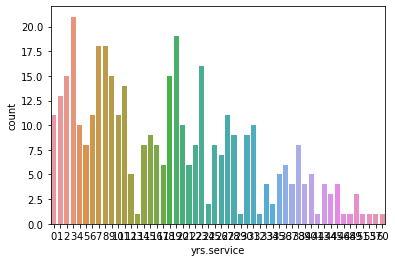

sex
1    354
0     39
Name: sex, dtype: int64


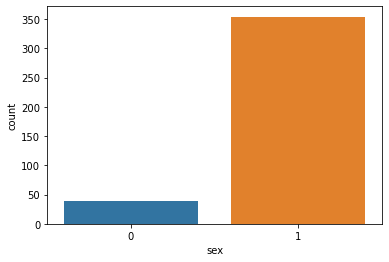

salary
74000     4
72500     4
92000     3
101000    3
105000    3
         ..
168635    1
76840     1
83001     1
113278    1
81035     1
Name: salary, Length: 371, dtype: int64


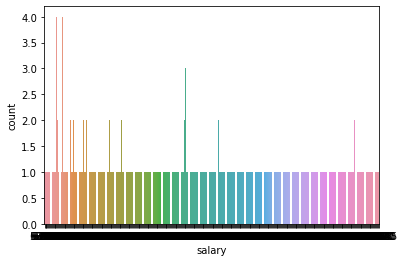

In [19]:
for col in df:
    print(col)
    print(df[col].value_counts())
    sns.countplot(df[col])
    plt.show()

In [20]:
# removing outliers
from scipy.stats import zscore
z = np.array(abs(zscore(df['yrs.service'])))
z

array([0.01881993, 0.13526822, 1.13684118, 1.63674547, 1.79083362,
       0.90570896, 0.40404029, 2.09900992, 0.17290807, 0.01881993,
       0.75162081, 1.21388525, 1.29092933, 1.3679734 , 0.01881993,
       1.13684118, 0.17290807, 1.25152511, 0.40404029, 1.40561325,
       0.63517252, 1.02039288, 0.94334881, 0.095864  , 0.75162081,
       0.75162081, 0.40404029, 1.13684118, 1.3679734 , 0.75162081,
       1.05979711, 1.21388525, 0.67457674, 1.21388525, 1.21388525,
       1.3679734 , 0.24995215, 1.05979711, 1.02039288, 0.67457674,
       1.21388525, 0.40404029, 0.71221659, 1.5597014 , 0.095864  ,
       0.21231229, 0.78926066, 0.095864  , 0.55812844, 1.29092933,
       0.78926066, 0.52048859, 1.13684118, 0.67457674, 0.52048859,
       0.98275303, 0.24995215, 0.75162081, 0.67457674, 1.13684118,
       0.75162081, 1.21388525, 1.02039288, 0.52048859, 1.13684118,
       0.75162081, 0.44344452, 1.02039288, 0.05822415, 1.40561325,
       1.21388525, 2.09900992, 0.095864  , 1.25152511, 0.40404

In [21]:
threshold = 3
print(np.where(z>3))

(array([131, 326], dtype=int64),)


In [22]:
z[131]

3.0235388011518114

In [23]:
df.iloc[131]

rank                 2
discipline           0
yrs.since.phd       56
yrs.service         57
sex                  1
salary           76840
Name: 131, dtype: int64

In [24]:
df_new=df.drop(131,axis=0)

In [25]:
df_new.shape

(392, 6)

In [26]:
df.shape

(393, 6)

In [27]:
loss_percent=((397-396)/397)*100
loss_percent

0.2518891687657431

In [28]:
x=df_new.iloc[:,:-1]

In [29]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
#Checking multicollinearity

def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [31]:
calc_vif(x)

,variables,VIF FACTOR
0,rank,6.500455
1,discipline,1.996766
2,yrs.since.phd,24.885273
3,yrs.service,16.095594
4,sex,5.487581


In [32]:
y = df_new['salary']

In [33]:
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1
...,...,...,...,...,...
392,2,0,33,30,1
393,2,0,31,19,1
394,2,0,42,25,1
395,2,0,25,15,1


In [34]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 392, dtype: int64

# Scaling the data using Standard Scaler:

In [35]:
scalar= StandardScaler()
x=scalar.fit_transform(x)
y=scalar.fit_transform(y.values.reshape(-1,1))

In [36]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [37]:
#using Linear Regression
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.34748141357425455
At random state 0,the testing accuracy is:- 0.4718883784040735


At random state 1,the training accuracy is:- 0.370112635153508
At random state 1,the testing accuracy is:- 0.4010600802615317


At random state 2,the training accuracy is:- 0.36539389479727336
At random state 2,the testing accuracy is:- 0.4048765209611024


At random state 3,the training accuracy is:- 0.3836868461883107
At random state 3,the testing accuracy is:- 0.3050115336420347


At random state 4,the training accuracy is:- 0.37221991354994133
At random state 4,the testing accuracy is:- 0.3711943906352373


At random state 5,the training accuracy is:- 0.400028318173124
At random state 5,the testing accuracy is:- 0.2700200808920956


At random state 6,the training accuracy is:- 0.37712376922117097
At random state 6,the testing accuracy is:- 0.3528465126118657


At random state 7,the training accuracy is:- 0.3761816045538505
At random state 7,the testing a

At random state 87,the training accuracy is:- 0.393821894229303
At random state 87,the testing accuracy is:- 0.21648160388212678


At random state 88,the training accuracy is:- 0.36774729078802515
At random state 88,the testing accuracy is:- 0.3818731495787152


At random state 89,the training accuracy is:- 0.3634426546490577
At random state 89,the testing accuracy is:- 0.4270089176419227


At random state 90,the training accuracy is:- 0.3703592880498774
At random state 90,the testing accuracy is:- 0.3766861117336061


At random state 91,the training accuracy is:- 0.37263725671069314
At random state 91,the testing accuracy is:- 0.3661959842432755


At random state 92,the training accuracy is:- 0.3724322546217099
At random state 92,the testing accuracy is:- 0.3593828189138828


At random state 93,the training accuracy is:- 0.3983867459865468
At random state 93,the testing accuracy is:- 0.26622460266231773


At random state 94,the training accuracy is:- 0.3666227922542721
At random state

# Cross Validation of the model:

In [38]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,20):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.31453262412749144 and accuracy score for training is 0.4027992486421902 and accuracy for the testing is 0.25231983400600544


At cross fold 3 the cv score is 0.32346692009413214 and accuracy score for training is 0.4027992486421902 and accuracy for the testing is 0.25231983400600544


At cross fold 4 the cv score is 0.3175538116007026 and accuracy score for training is 0.4027992486421902 and accuracy for the testing is 0.25231983400600544


At cross fold 5 the cv score is 0.29792011789112294 and accuracy score for training is 0.4027992486421902 and accuracy for the testing is 0.25231983400600544


At cross fold 6 the cv score is 0.33534910589990935 and accuracy score for training is 0.4027992486421902 and accuracy for the testing is 0.25231983400600544


At cross fold 7 the cv score is 0.3280387003144267 and accuracy score for training is 0.4027992486421902 and accuracy for the testing is 0.25231983400600544


At cross fold 8 the cv score is 0.33379792

# Regularization

In [39]:
from sklearn.model_selection import GridSearchCV #used to maximize the performance of model
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [40]:
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf= GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}

# here we are using two parameter but it is mandatory to use atleast 4 parameters
rf = RandomForestRegressor()
clf= GridSearchCV(rf,parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [42]:
rf = RandomForestRegressor(criterion="mae", max_features='sqrt')
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs= r2_score(y_test,pred_decision)
print('R2 Score:', rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:', rfc*100)

R2 Score: 28.649434495934468
Cross Val Score: 28.598808041646993


In [43]:
import pickle
filename= 'salary.pkl'
pickle.dump(rfs,open(filename, 'wb'))